In [12]:
import xgboost
print (xgboost.__version__)

0.81


In [ ]:
150,3类，每类50，0-100

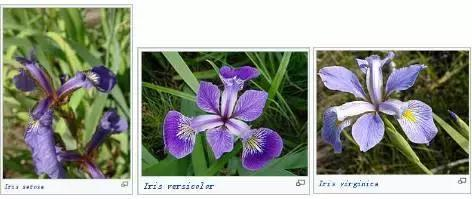

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


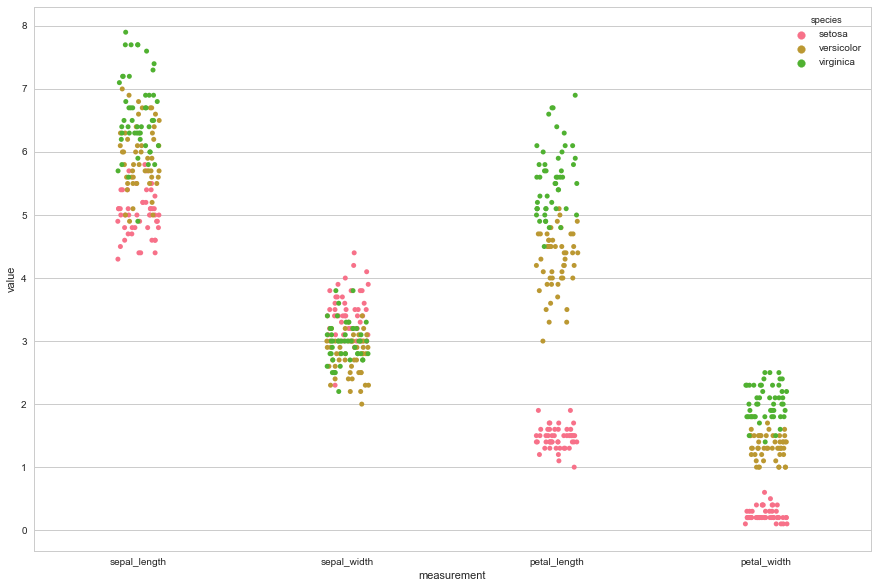

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#加载数据
iris = sns.load_dataset("iris")
print (iris.head())
print(iris.shape)
iris = pd.melt(iris, "species", var_name="measurement")

sns.set(style="whitegrid", palette="husl")
f, ax = plt.subplots(1, figsize=(15,10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)
plt.show()


In [16]:
from sklearn.datasets import load_iris
#加载数据【DESC.DATA,FEATURE_NAMES,TARGET_NAMES】
iris=load_iris()
type(iris),type(iris.data)

(sklearn.utils.Bunch, numpy.ndarray)

In [18]:
label=iris.target[:]
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#2类
data=iris.data[:100]

label=iris.target[:100]


In [29]:
from  sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data,label,test_size=0.25,random_state=0)
print(train_x.shape)

(75, 4)


In [36]:
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)

In [52]:
#确定参数,dict-k-v传参数
params={'booster':'gbtree',   
    'objective': 'binary:logistic',  
    'eval_metric': 'mae',               
    'gamma': 0.1,          
    'lambda':1,                
    'min_child_weight':2,     
    'eta': 0.1,           
    'seed':0,               
    'nthread':4,            
    'silent':1 ,              
     }
watchlist=[(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
ypred=bst.predict(dtest)
print(ypred)
y_pred=(ypred>0.5)*1
print(y_pred)
#模型的评价
from sklearn import metrics
metrics.confusion_matrix(test_y,y_pred)

[0]	train-mae:0.454942
[1]	train-mae:0.414262
[2]	train-mae:0.377495
[3]	train-mae:0.344238
[4]	train-mae:0.314137
[ 0.31433716  0.68605822  0.31433716  0.68605822  0.68605822  0.68605822
  0.31433716  0.68605822  0.68605822  0.68605822  0.68605822  0.68605822
  0.68605822  0.31433716  0.31433716  0.31433716  0.31433716  0.31433716
  0.31433716  0.31433716  0.31433716  0.68605822  0.31433716  0.68605822
  0.31433716]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


array([[13,  0],
       [ 0, 12]], dtype=int64)

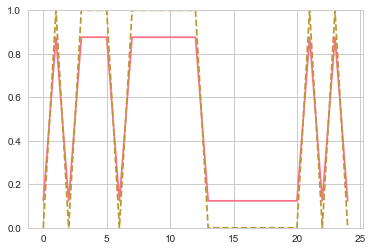

In [48]:
import matplotlib.pyplot as plt
plt.plot(ypred,label="predict")
plt.plot(test_y,linestyle="--"  ,label="ture")
plt.ylim(0,1)
plt.show()

[0]	train-mae:0.484047
[1]	train-mae:0.468628
[2]	train-mae:0.453743
[3]	train-mae:0.439388
[4]	train-mae:0.425556
[ 0.4261913   0.57506245  0.4261913   0.57506245  0.57506245  0.57506245
  0.4261913   0.57506245  0.57506245  0.57506245  0.57506245  0.57506245
  0.57506245  0.4261913   0.4261913   0.4261913   0.4261913   0.4261913
  0.4261913   0.4261913   0.4261913   0.57506245  0.4261913   0.57506245
  0.4261913 ]
[[13  0]
 [ 0 12]]


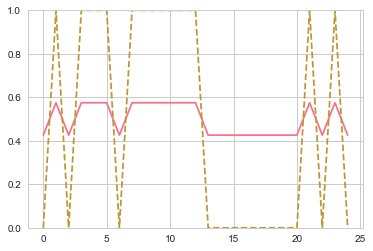

In [56]:
params["lambda"]=20    
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
#输出概率
ypred=bst.predict(dtest)
print(ypred)
#模型评价
from sklearn import metrics
print(metrics.confusion_matrix(test_y,y_pred))

import matplotlib.pyplot as plt
plt.plot(ypred,label="predict")
plt.plot(test_y,linestyle="--"  ,label="ture")
plt.ylim(0,1)
plt.show()

[0]	train-mae:0.484047
[1]	train-mae:0.468628
[2]	train-mae:0.453743
[3]	train-mae:0.439388
[4]	train-mae:0.425556
[[13  0]
 [ 0 12]]


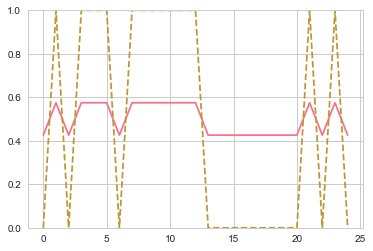

In [55]:
params["gamma"]=5  
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
#输出概率
ypred=bst.predict(dtest)


#模型评价
from sklearn import metrics
print(metrics.confusion_matrix(test_y,y_pred))

import matplotlib.pyplot as plt
plt.plot(ypred,label="predict")
plt.plot(test_y,linestyle="--"  ,label="ture")
plt.ylim(0,1)
plt.show()